In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2024W1) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports 

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:5}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

## Exercise 1: Dataset and preliminary EDA
<hr>


In this homework, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={autograde}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Typically, having more data for training is beneficial. However, in this lab, we'll be using a 40%/60% split because running cross-validation with this dataset can take a long time on a modest laptop. Using a smaller training set will make the model training a bit faster on your laptop. Additionally, with a larger test split, we’ll obtain a more reliable estimate of the model's performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

In [4]:
train_df = None
test_df = None

train_df, test_df = train_test_split(census_df, test_size=0.6, random_state=123)
display(train_df, test_df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5917,26,Private,214303,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
28237,27,Private,202206,11th,7,Separated,Farming-fishing,Other-relative,White,Male,0,0,40,Puerto-Rico,<=50K
12846,49,Private,151584,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
25706,19,Private,351802,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,48,Private,70668,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,50,United-States,<=50K
17730,35,Private,340018,10th,6,Never-married,Other-service,Unmarried,Black,Female,0,0,38,United-States,<=50K
28030,26,Private,373553,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,42,United-States,<=50K
15725,28,Private,155621,5th-6th,3,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Columbia,<=50K


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
20713,40,Self-emp-not-inc,240698,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
13495,36,Federal-gov,184556,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
22402,61,Self-emp-not-inc,224784,Assoc-acdm,12,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,90,United-States,<=50K
18338,25,Private,306513,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,45,Private,160724,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K
15249,34,Private,152453,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Guatemala,<=50K
29355,40,Private,242521,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
19775,36,Self-emp-not-inc,202950,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran,<=50K


In [5]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

Let's examine our `train_df`. 

In [6]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [7]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [8]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 1.2 `describe()` method
rubric={autograde}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What are the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns, irrespective of whether you want to include them in your model or not, as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 5

In [9]:
census_summary = None

census_summary = train_df.describe(include="all")
display(census_summary)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12284,1.302400e+04,13024,13024.000000,13024,12281,13024,13024,13024,13024.000000,13024.000000,13024.000000,12783,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9123,NaN,4153,NaN,5936,1649,5195,11158,8700,NaN,NaN,NaN,11717,9875
mean,38.546913,NaN,1.884759e+05,NaN,10.057432,NaN,NaN,NaN,NaN,NaN,1079.831695,86.543074,40.395654,NaN,NaN
std,13.610225,NaN,1.040895e+05,NaN,2.553084,NaN,NaN,NaN,NaN,NaN,7322.034546,403.025863,12.285347,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.170962e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778990e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.365655e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
max_hours_per_week = None

max_hours_per_week = census_summary["hours.per.week"]["max"]
display(max_hours_per_week)

99.0

In [11]:
most_freq_occupation = None

most_freq_occupation = census_summary["occupation"]["top"]
display(most_freq_occupation)

'Prof-specialty'

In [12]:
missing_vals_cols = []
numeric_cols = []

missing_vals_cols = census_summary.columns[census_summary.loc["count"] < train_df.shape[0]].tolist()
display(missing_vals_cols)

numeric_cols = census_summary.select_dtypes(include=["number"]).columns.tolist()
display(numeric_cols)

['workclass', 'occupation', 'native.country']

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [13]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [14]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Visualizing features
rubric={viz,reasoning}

**Your tasks:**

1. For each numeric feature listed in `numeric_cols`, generate overlapping histograms for the <=50K and >50K classes, similar to how you did it in homework 2.
2. Provide a brief description of your preliminary observations based on the histograms. 

> You can use the library of your choice for visualization. 

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 4

Overall, there are far more observations with incomes of less than 50K.

The features `age`, `education.num`, and `hours.per.week` appear to have the most potential as predictors. Those with higher incomes tend to be older, more educated, and work more hours per week compared to those with lower incomes.

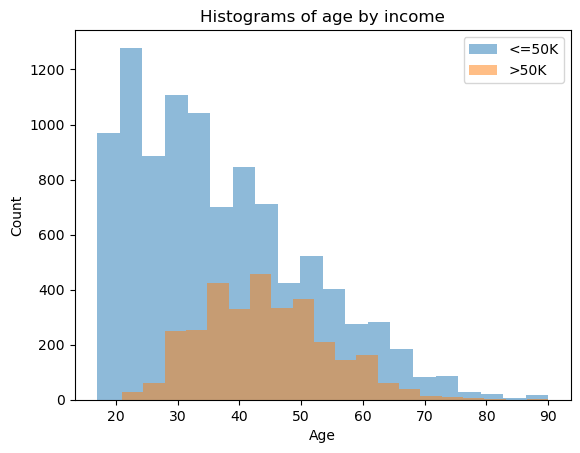

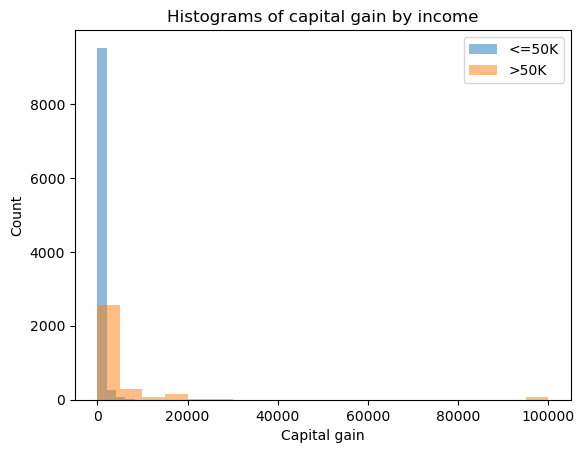

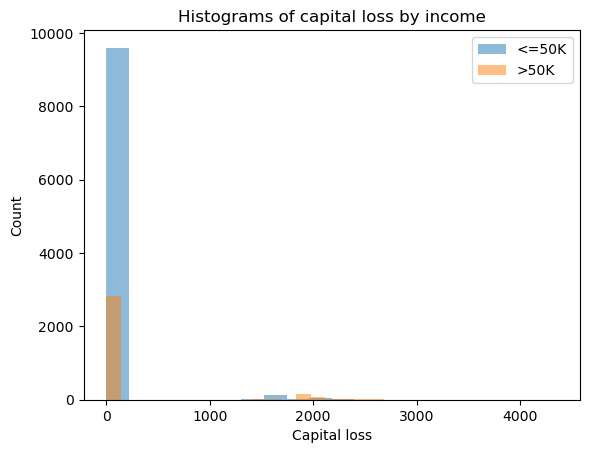

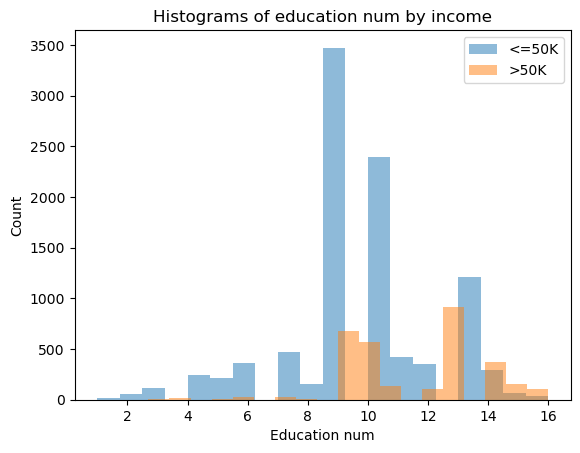

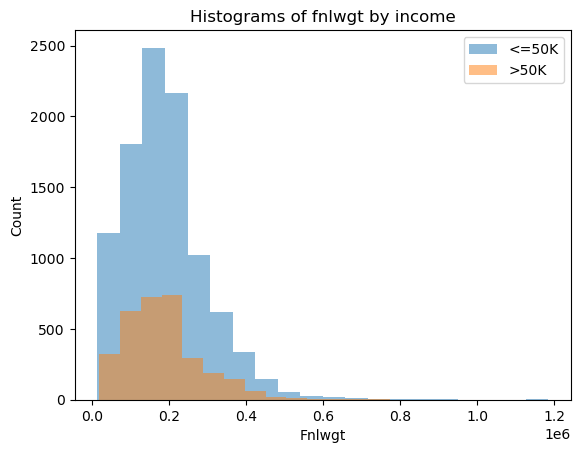

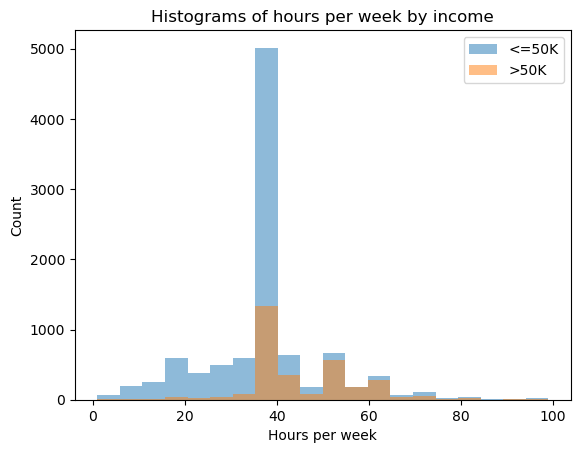

In [15]:
for c in numeric_cols:
    for i in train_df["income"].value_counts().index:
        plt.hist(train_df[train_df["income"] == i][c], bins=20, alpha=0.5, label=i)

    plt.title("Histograms of " + c.replace(".", " ") + " by income")
    plt.legend()
    plt.xlabel(c.replace(".", " ").capitalize())
    plt.ylabel("Count")
    plt.show()

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: Identifying different feature types and transformations  
<hr>

Typically, data isn't readily formatted for direct input into machine learning models. It's crucial for a machine learning practitioner to examine each column and determine an effective method for encoding its information. Let's determine the types of features we have and come up with suitable encoding strategies for them. 

<!-- BEGIN QUESTION -->

### 2.1 Identify transformations to apply
rubric={reasoning}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below for the purpose of autograding. 

> You can find the information about the columns [here](http://archive.ics.uci.edu/ml/datasets/Adult).

<div class="alert alert-warning">

Solution_2.1
    
</div>

| Feature        | Transformation                      | Explanation                                                                                                                                  |
| -------------- | ----------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| age            | scaling with `StandardScaler`       | A numeric feature with no missing values, ranging from 17 to 90. Scaling is recommended due to its distinct range compared to other numeric features. While MinMaxScaler might be more suitable, using StandardScaler should be fine too. |
| workclass      | imputation, one-hot encoding        | Categorical feature with some missing values. Should impute to replace missing values. Should apply one-hot encoding to obtain numeric form. |
| fnlwgt         | drop                                | Not a useful predictor for `income`; measures similarity of observations by demographic.                                                     |
| education      | ordinal encoding                    | Ordinal feature with no missing values. Should apply ordinal encoding to obtain numeric form.                                                |
| education.num  | drop                                | Not a useful predictor for `income`; redundant with `education`.                                                                             |
| marital.status | one-hot encoding                    | Categorical feature with no missing values. Should apply one-hot encoding to obtain numeric form.                                            |
| occupation     | imputation, one-hot encoding        | Categorical feature with some missing values. Should impute to replace missing values. Should apply one-hot encoding to obtain numeric form. |
| relationship   | one-hot encoding                    | Categorical feature with no missing values. Should apply one-hot encoding to obtain numeric form.                                            |
| race           | drop                                | Possibly correlated with `income`; however, training on this feature could introduce racial bias into the model, which is unethical and potentially illegal. |
| sex            | one-hot encoding with "binary=True" | Categorical feature with no missing values and exactly 2 distinct values. Should apply one-hot encoding to obtain numeric form. (Consider: training on this feature could introduce sexual bias into the model, similarly to `race`...) |
| capital.gain   | scaling with `StandardScaler`       | Numeric feature with no missing values ranging between 0 and 99999. Should scale to make range consistent with other numeric features.       |
| capital.loss   | scaling with `StandardScaler`       | Numeric feature with no missing values ranging between 0 and 4356. Should scale to make range consistent with other numeric features.        |
| hours.per.week | scaling with `StandardScaler`       | Numeric feature with no missing values ranging between 1 and 99. Should scale to make range consistent with other numeric features.          |
| native.country | imputation, one-hot encoding        | Categorical feature with some missing values. Should impute to replace missing values. Should apply one-hot encoding to obtain numeric form. |


_Points:_ 13

See table.

<!-- END QUESTION -->

<br><br>

### 2.2 Identify feature types 
rubric={autograde}


**Your tasks:**
1. Based on the types of transformations we want to apply on the features above, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.2
    
</div>

_Points:_ 5

In [16]:
# Fill in the lists below.
numeric_features = []
categorical_features = []
ordinal_features = []
binary_features = []
drop_features = []
target = "income"

numeric_features = ["age", "capital.gain", "capital.loss", "hours.per.week"]
categorical_features = ["workclass", "marital.status", "occupation", "relationship", "native.country"]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = ["fnlwgt", "education.num", "race"]

In [17]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [18]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 1

In [19]:
X_train = None
y_train = None
X_test = None
y_test = None

X_train, y_train = train_df.drop(columns=[target]), train_df[target]
display(X_train, y_train)

X_test, y_test = test_df.drop(columns=[target]), test_df[target]
display(X_test, y_test)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5917,26,Private,214303,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States
28237,27,Private,202206,11th,7,Separated,Farming-fishing,Other-relative,White,Male,0,0,40,Puerto-Rico
12846,49,Private,151584,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
25706,19,Private,351802,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,48,Private,70668,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,50,United-States
17730,35,Private,340018,10th,6,Never-married,Other-service,Unmarried,Black,Female,0,0,38,United-States
28030,26,Private,373553,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,42,United-States
15725,28,Private,155621,5th-6th,3,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Columbia


5917     <=50K
32065    <=50K
28237    <=50K
12846     >50K
25706    <=50K
         ...  
28636    <=50K
17730    <=50K
28030    <=50K
15725    <=50K
19966    <=50K
Name: income, Length: 13024, dtype: object

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20713,40,Self-emp-not-inc,240698,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
13495,36,Federal-gov,184556,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
22402,61,Self-emp-not-inc,224784,Assoc-acdm,12,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,90,United-States
18338,25,Private,306513,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,45,Private,160724,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam
15249,34,Private,152453,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Guatemala
29355,40,Private,242521,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
19775,36,Self-emp-not-inc,202950,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran


20713    <=50K
13495    <=50K
12367    <=50K
22402    <=50K
18338    <=50K
         ...  
21241    <=50K
15249    <=50K
29355     >50K
19775    <=50K
24495    <=50K
Name: income, Length: 19537, dtype: object

In [20]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

### 3.2 Dummy classifier
rubric={autograde}

**Your tasks:**

1. Carry out 5-fold cross-validation using [`scikit-learn`'s `cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function with `return_train_score=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 1

In [21]:
dummy_df = None 

dummy_df = pd.DataFrame(cross_validate(DummyClassifier(), X_train, y_train, cv=5, return_train_score=True))
display(dummy_df)

,fit_time,score_time,test_score,train_score
0,0.002945,0.002333,0.758157,0.758230
1,0.002801,0.002148,0.758157,0.758230
2,0.002894,0.002126,0.758157,0.758230
3,0.002681,0.002231,0.758157,0.758230
4,0.002757,0.002078,0.758449,0.758157


In [22]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={reasoning}

**Your tasks:**
1. Hopefully, you successfully run cross-validation with the dummy classifier in the previous question. Now, if you were to train the [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train`, would it work? Briefly explain your reasoning.

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

No. We have not applied any transformations to the data yet. The SVC will not be able to operate on the non-numeric features.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Column transformer 
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. First, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer` using `make_column_transformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [23]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> Ordering of some of the education levels is not obvious. Assume that "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [24]:
ordinal_transformer = None

ordinal_transformer = OrdinalEncoder(categories=[["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Prof-school", "Assoc-voc", "Assoc-acdm", "Some-college", "Bachelors", "Masters", "Doctorate"]], dtype=int)

In [25]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features to encode binary features as integers 0 and 1.

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [26]:
binary_transformer = None

binary_transformer = OneHotEncoder(dtype=int, drop="if_binary")

In [27]:
grader.check("q4.2")

q4.2 results: All test cases passed!

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde}

There are a few categorical features with missing values in our dataset. Our initial step is to impute these missing values before proceeding to one-hot encode the features. For this assignment, apply imputation to all categorical features, regardless of whether they have missing values. If a feature lacks missing values, the imputation step will have no effect.

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps:
- `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"`
- `OneHotEncoder` with `handle_unknown="ignore"` and `sparse_output=False` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [28]:
categorical_transformer = None

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(dtype=int, handle_unknown="ignore", sparse_output=False))

In [29]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [30]:
preprocessor = None

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features))

In [31]:
transformed_df = None
n_new_cols = None

transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))
display(transformed_df)

n_new_cols = transformed_df.shape[1] - X_train.shape[1]
display(n_new_cols)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.921909,-0.147483,-0.214742,0.781802,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.436248,-0.147483,-0.214742,-2.148630,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.848432,-0.147483,-0.214742,-0.032207,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.768061,-0.147483,-0.214742,-0.032207,12.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.436248,-0.147483,-0.214742,-0.439211,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13019,0.694584,-0.147483,-0.214742,0.781802,8.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13020,-0.260617,-0.147483,-0.214742,-0.195008,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13021,-0.921909,-0.147483,-0.214742,0.130595,12.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13022,-0.774955,-0.147483,-0.214742,-0.032207,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


70

In [32]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 4.5 Short answer questions
rubric={reasoning}

**Your tasks:**

Answer each of the following questions in 2 to 3 sentences. 

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

<div class="alert alert-warning">
    
Solution_4.5
    
</div>

_Points:_ 8

1. It is incorrect to fit a transformer on the test data because it violates the golden rule. We should assume that we know nothing about the test data and should not include any information about it into the training process.

2. The golden rule forbids test data from leaking into the training data, because in deployment, we cannot assume we know anything about the real-world data. A model that violates the golden rule will perform better on the test data but is likely to perform worse when deployed.

3. Pipelines are less prone to user error by making it more difficult to accidentally omit or repeat a pre-processing step. Additionally, pipelines make it possible to use `cross_validate` without polluting the validation data as it will perform any required pre-processing per fold.

4. A `ColumnTransformer` should be used when working with multiple types of data (numeric, categorical, ordinal) which require different pre-processing steps.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [33]:
results_dict = {}  # dictionary to store all the results

In [34]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below, I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [35]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.015 (+/- 0.000),0.006 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

### 5.1 Trying different classifiers
rubric={accuracy,quality}

**Your tasks:**

1. For each model provided in the starter code below:
    - Create a pipeline using `make_pipeline` with two steps: the preprocessor from section 4.4 and the model as your classifier.
    - Conduct 5-fold cross-validation using the pipeline. Obtain the mean cross-validation scores and standard deviation using the `mean_std_cross_val_scores` function provided earlier.
    - Record the results in a dataframe named `income_pred_results_df`. Use the model names from the models dictionary below as the index. Each row should represent results from the `mean_std_cross_val_scores` function. In essence, `income_pred_results_df` should resemble the `results_df` dataframe mentioned earlier, but with additional rows for the subsequent models.

> Note: The execution might take some time. Please be patient!"

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [37]:
income_pred_results_df = None 

for m in models:
    results_dict[m] = mean_std_cross_val_scores(make_pipeline(preprocessor, models[m]), X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(results_dict).T
display(income_pred_results_df)

,fit_time,score_time,test_score,train_score
dummy,0.015 (+/- 0.000),0.006 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.051 (+/- 0.001),0.006 (+/- 0.000),0.813 (+/- 0.011),0.987 (+/- 0.001)
kNN,0.018 (+/- 0.001),0.050 (+/- 0.013),0.836 (+/- 0.008),0.884 (+/- 0.003)
RBF SVM,1.724 (+/- 0.081),0.870 (+/- 0.039),0.852 (+/- 0.005),0.855 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={reasoning}

**Your tasks:**

Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above and answer the questions below: 

1. Among the models, which one achieves the highest validation accuracy?
2. Excluding the dummy model, which model exhibits the shortest 'fit' time? Similarly, which model boasts the quickest 'score' time?
3. Among the models (excluding the dummy model), which one shows the highest degree of overfitting and which one exhibits the least overfitting?

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

1. The RBF SVM model had the highest validation accuracy at approximately 0.852.

2. The kNN model had the fastest fit time at approximately 0.019 seconds. The decision tree had the fastest score time at approximately 0.007 seconds.

3. Assuming that overfitting is measured by the difference between the training score and the validation score, the decision tree model had the most overfitting. The RBF SVM model had the least overfitting.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={accuracy,quality}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? In this assignment, consider the hyperparameter value that gives you the highest cross-validation score as the "best" one. Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the highest CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [38]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

{'C': array([  0.1,   1. ,  10. , 100. ])}

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

The value of C with the highest validation score is 100, which is very different from the default value of 1. Overall, the validation score increased with C within the given range.

In [39]:
for c in param_grid["C"]:
    results_dict[f"RBF SVM (C = {c})"] = mean_std_cross_val_scores(make_pipeline(preprocessor, SVC(C=c, random_state=123)), X_train, y_train, cv=5, return_train_score=True)

display(pd.DataFrame(results_dict).T)

,fit_time,score_time,test_score,train_score
dummy,0.015 (+/- 0.000),0.006 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.051 (+/- 0.001),0.006 (+/- 0.000),0.813 (+/- 0.011),0.987 (+/- 0.001)
kNN,0.018 (+/- 0.001),0.050 (+/- 0.013),0.836 (+/- 0.008),0.884 (+/- 0.003)
RBF SVM,1.724 (+/- 0.081),0.870 (+/- 0.039),0.852 (+/- 0.005),0.855 (+/- 0.002)
RBF SVM (C = 0.1),2.072 (+/- 0.108),1.081 (+/- 0.037),0.838 (+/- 0.006),0.838 (+/- 0.002)
RBF SVM (C = 1.0),1.819 (+/- 0.191),0.879 (+/- 0.066),0.852 (+/- 0.005),0.855 (+/- 0.002)
RBF SVM (C = 10.0),1.682 (+/- 0.070),0.789 (+/- 0.021),0.858 (+/- 0.005),0.862 (+/- 0.002)
RBF SVM (C = 100.0),2.166 (+/- 0.112),0.773 (+/- 0.041),0.860 (+/- 0.006),0.871 (+/- 0.002)


In [40]:
best_C = None

best_C = 100

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.4 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 3

In [41]:
final_pipeline = None
test_score = None

final_pipeline = make_pipeline(preprocessor, SVC(C=best_C, random_state=123))
final_pipeline.fit(X_train, y_train)

test_score = final_pipeline.score(X_test, y_test)
display(test_score)

0.8497722270563546

In [42]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0 & 0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

<div class="alert alert-warning">
    
Solution_7.1
    
</div>

_Points:_ 4

1. The kNN model would predict a value of 1 using the nearest data point (2, 2).

2. The kNN model would predict a value of 0 using the nearest 3 data points (2, 2), (4, -2), and (5, 2).

3. Assuming that the kNN model is using the mean for regression, it would predict a value of 0.33 using the nearest 3 data points (2, 2), (4, -2), and (5, 2).

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 



Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

